# Import Modules

In [1]:
from Dataload import dataload

from module import transformer,video_model,invres

import torch
import torch.nn as nn
from torchsummary import summary
from sklearn.metrics import confusion_matrix
from torch.utils.data import Dataset, DataLoader
import matplotlib.pylab as plt
from torchvision import  utils
from constant import EMOTIPATH
from src import detect_faces, show_bboxes
from PIL import Image
import numpy as np
from torchvision import transforms

In [ ]:


#np_load_old = np.load
#np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)


# Test Image #1

In [26]:
import os
Train_label=os.path.join(EMOTIPATH,"Train_labels.txt")
Train_video=os.path.join(EMOTIPATH,"Train")
Val_labels=os.path.join(EMOTIPATH,"Val_labels.txt")
Val_video=os.path.join(EMOTIPATH,"Val")
train_data=dataload.Video_Frame_Data(Train_label,base_path_v=Train_video,frame_num=24)

img=train_data[2556][0][4]




class Facial(Dataset):
    def __init__(self,image,max_number):
        self.img=img
        self.max_number=max_number
        self.transform1=transforms.Resize((64,64))
        self.face=self.face_extraction(img)
        self.pil=self.toonePIL(self.face)
    def face_extraction(self,img):
        bounding_boxes, landmarks = detect_faces(img)
        img_list=[]
        
        for box_index,(left,right,up,bottom,_) in enumerate(bounding_boxes):
            cropped_img=img.crop((left,right,up,bottom))
            img_list.append(self.transform1(cropped_img))
            
            if len(img_list)==max_face:
                break
        while len(img_list) !=max_face:
            END_PAD= Image.new(mode = "RGB", size = (256, 256), color =(0, 0, 0))
            img_list.append(self.transform1(END_PAD))   
        return img_list
    
    def toonePIL(self,x):
        new_im = Image.new('RGB', (64*self.max_number,64))

        x_offset = 0
        for im in x:
            new_im.paste(im, (x_offset,0))
            x_offset += im.size[0]
        return new_im
    
max_face=5
img=transforms.ToPILImage()(img*0.5+0.5)
data=Facial(img,max_face)

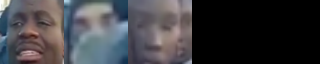

In [27]:
data.pil

In [ ]:
for train_video in :
    for train_frame in train_video

In [ ]:
test_model(img_list[1].unsqueeze(0)).shape

In [ ]:
class Face_Feature(nn.Module):
    
    def __init__(self):
        super(Face_Feature, self).__init__()
        
        self.resnet=resnet18()
        self.fc1=nn.Linear(1000,2)
        
    def forward(self,x):
        
        return self.fc1(self.resnet(x))

In [ ]:
test_model=Face_Feature()

In [ ]:
a=test_model(img_list[1].unsqueeze(0))

In [ ]:
loss_func = torch.nn.MSELoss()


In [ ]:
import pandas as pd
training_data=pd.read_csv("training.csv")

from torch.utils.data import Dataset, DataLoader


In [ ]:
class AffectNetData(Dataset):
    def __init__(self, csv_file,base_path):
        self._base_path=base_path
        self._table = pd.read_csv(csv_file)
        self.transform=transforms.Compose([
                     transforms.Resize((64,64)),
                     transforms.ToTensor(),   
                     transforms.Normalize((0.5,0.5,0.5 ), (0.5, 0.5,0.5))])
    def __len__(self):
        return len(self._table)

    def __getitem__(self, idx):
        img_path = os.path.join(self._base_path_v,self._table.subDirectory_filepath[idx])
        arousal=torch.from_numpy(np.array(self._table.arousal[idx]))
        valence=torch.from_numpy(np.array(self._table.valence[idx]))
        labels=torch.stack(arousal,valence).float()
        img=Image.open(img_path)
        img=self.transform(img)
        return (img,labels)

In [ ]:
data_transform=transforms.Compose([
                     transforms.Resize((64,64)),
                     transforms.ToTensor(),   
                     transforms.Normalize((0.5,0.5,0.5 ), (0.5, 0.5,0.5))])

In [ ]:
#
#train_set=AffectNetData("training.csv","AffectNet")
#valid_set=AffectNetData("validation.csv","AffectNet")

In [ ]:
#train_dataloader = DataLoader(train_data, batch_size=256
#                       , num_workers=0,shuffle=True)

#valid_dataloader = DataLoader(valid_data, batch_size=256
#                       , num_workers=0)

In [ ]:
#da